# Datos EPL  2008-2018 Valor de mercado de las plantillas y posición final

En este notebook aplicaremos un modelo de regresión lineal simple a los datos del valor de las plantillas en relación con su rendimiento en la Premier League. Esto podría ayudarnos a determinar cuánto debe invertir un equipo para evitar el descenso, clasificar a competiciones europeas o establecer un objetivo basado en datos para nuestro equipo.

Los pasos que seguiremos incluyen una exploración rápida del conjunto de datos, la creación del modelo y luego una evaluación de los resultados obtenidos.

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [90]:
data = pd.read_csv("positionsvsValue.csv")
data.head(25)

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8
5,EPL,2008,Manchester City,32,24.0,20,206.80,6.46,8,50,10
6,EPL,2008,Everton FC,28,24.4,15,162.55,5.81,18,63,5
7,EPL,2008,Newcastle United,32,24.8,20,134.95,4.22,-19,34,18
8,EPL,2008,Portsmouth FC,31,26.8,19,131.50,4.24,-19,41,14
9,EPL,2008,Aston Villa,21,25.4,8,111.80,5.32,6,62,6


In [62]:
data.describe()

,Season,Squad,Average Age,Non-Homegrown,Squad Value,GD,Points,Position
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2013.000000,36.304545,24.793636,22.886364,225.792909,0.000000,52.245455,10.500000
std,3.169489,5.410372,1.136427,5.377171,183.079602,27.061405,17.569788,5.779431
min,2008.000000,21.000000,21.300000,8.000000,22.500000,-54.000000,16.000000,1.000000
25%,2010.000000,33.000000,23.975000,19.000000,99.662500,-20.000000,40.000000,5.750000
50%,2013.000000,36.000000,24.800000,22.000000,158.275000,-7.000000,47.000000,10.500000
75%,2016.000000,40.000000,25.500000,26.000000,299.782500,20.250000,64.250000,15.250000
max,2018.000000,54.000000,28.100000,41.000000,1000.100000,79.000000,100.000000,20.000000


Tenemos un conjunto de datos con 220 filas, donde cada fila representa un equipo en cada temporada de la Premier League desde la campaña 2008/09.

Para cada equipo, contamos con la siguiente información:
- Tamaño de la plantilla
- Edad promedio del equipo
- Valor de la plantilla (en euros)

Además, disponemos de datos de rendimiento, incluyendo:
- Diferencia de goles
- Puntos obtenidos
- Posición en la liga

Estos valores han sido tomados de Transfermarkt.

Nuestro objetivo es construir un modelo que nos ayude a predecir los puntos de un equipo en función del valor de su plantilla. Antes de hacerlo, es importante analizar las relaciones entre algunas de las variables clave.

Para ello, realizaremos una exploración visual utilizando un pairplot con las variables Temporada, Diferencia de Goles, Valor de la Plantilla, Puntos y Posición para analizar sus correlaciones.

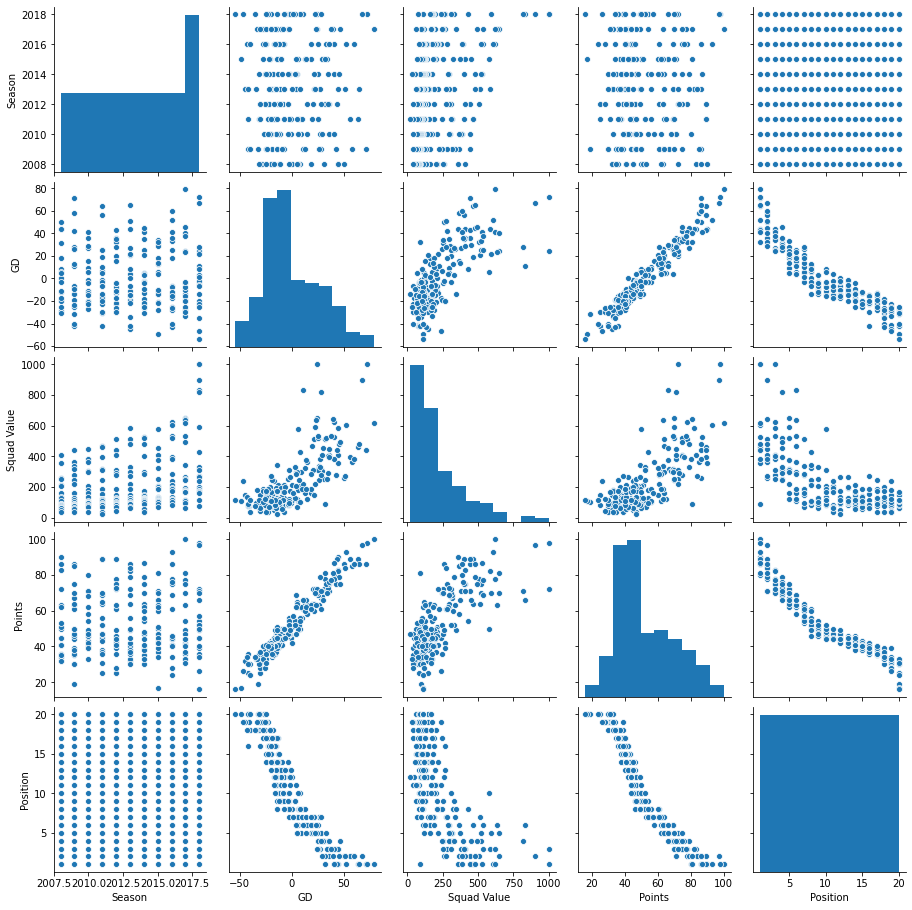

In [93]:
sns.pairplot(data[['Season','GD', 'Squad Value', 'Points', 'Position']]  );

## Algunos puntos interesantes a tener en cuenta:

- Los puntos y la diferencia de goles tienen una correlación muy fuerte, como era de esperarse.
- El valor de la plantilla aumenta a medida que la diferencia de goles y los puntos aumentan, aunque sigue más bien una curva en lugar de una línea recta.
- El valor de la plantilla ha aumentado con el tiempo (esto es importante y lo retomaremos más adelante).

Volviendo a nuestro problema inicial (modelar el valor de la plantilla en función del rendimiento), necesitamos definir qué entendemos por rendimiento.

Podemos responder a esto observando qué variable (puntos o posición en la tabla) se correlaciona más con el valor de la plantilla. Para ello, vamos a comprobar si la posición en la liga tiene una mayor correlación con el valor de la plantilla que los puntos.

## Correlación entre valoración de la plantilla y puntos

In [66]:
data['Squad Value'].corr(data['Points'])

0.7392567705822437

Como podemos observar, la correlación es positiva entre estas dos variables, así que podemos afirmar que existe una relación entre el valor de la plantilla y los puntos obtenidos en liga. Además, el valor de dicha correlación es alto, lo que nos indica que es fuerte.

In [67]:
abs( data['Squad Value'].corr(data['Position']) ) > data['Squad Value'].corr(data['Points'] )

False

En valor absoluto la correlación entre Squad Value y Position no es mayor que la correlación entre Squad Value y Points

# Construiremos el modelo para predecir el número de puntos (y) en base al valor de plantilla (x)

#Construcción de nuestro Modelo de Regresión

Seguiremos los siguientes pasos:

* **Obtener y reorganizar las dos columnas que queremos usar en nuestro modelo: Puntos y Valor de la Plantilla**  
* **Dividir cada una de las dos variables en un conjunto de entrenamiento y un conjunto de prueba**. El conjunto de entrenamiento construirá nuestro modelo, mientras que el conjunto de prueba nos permitirá evaluar su calidad.  
* **Crear un modelo de regresión lineal vacío y ajustarlo con los conjuntos de entrenamiento**  
* **Examinar y probar el modelo**  
* **Métricas del modelo: Error Absoluto Medio (Mean Absolute Error)**  

### Obtener nuestras dos columnas en variables y luego reorganizarlas  

In [94]:
X = data['Squad Value']

y = data['Points']

In [95]:
X

0      406.70
1      356.10
2      257.23
3      250.85
4      212.60
        ...  
215    172.65
216    170.40
217    160.43
218    113.15
219     76.00
Name: Squad Value, Length: 220, dtype: float64

In [97]:
X = X.values.reshape(-1,1)

In [98]:
type(X)

numpy.ndarray

In [99]:
X[0:10]

array([[406.7 ],
       [356.1 ],
       [257.23],
       [250.85],
       [212.6 ],
       [206.8 ],
       [162.55],
       [134.95],
       [131.5 ],
       [111.8 ]])

In [100]:
y = y.values.reshape(-1,1)

In [101]:
type(y)

numpy.ndarray

In [102]:
y[0:10]

array([[83],
       [90],
       [86],
       [72],
       [51],
       [50],
       [63],
       [34],
       [41],
       [62]], dtype=int64)

### Usar la función train_test_split para crear nuestros conjuntos de entrenamiento y prueba  

Vamos a partir conjuntos de datos, 75% para entrenar el modelo y 25% para probarlo 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [104]:
X_train.shape

(165, 1)

In [105]:
X_test.shape

(55, 1)

### Crear Modelo

In [106]:
lm = LinearRegression()
lm

LinearRegression()

### Entrenar el modelo

In [107]:
lm.fit(X_train,y_train)

LinearRegression()

### Mostrar los coeficientes  

In [108]:
print(lm.coef_)

[[0.07152655]]


Lo que nos indica este coeficiente es que de media, por cada millon extra en el valor dee la plantilla, se obtienen 0.07 puntos a final de temporada.

### Término independiente (intercept)

In [109]:
lm.intercept_

array([35.50273481])

#### Fórmula final generada
`Points = 0.07152655 * Squad Value+ 35.5`

### Realizar las predicciones

In [110]:
predictions = lm.predict(X_test)

In [111]:
predictions[0:10]

array([[40.99597418],
       [42.83420663],
       [43.51013257],
       [80.84341758],
       [55.2047242 ],
       [44.1238304 ],
       [46.87188062],
       [42.59101635],
       [50.70928026],
       [69.76395432]])

### Crear gráfico con el modelo

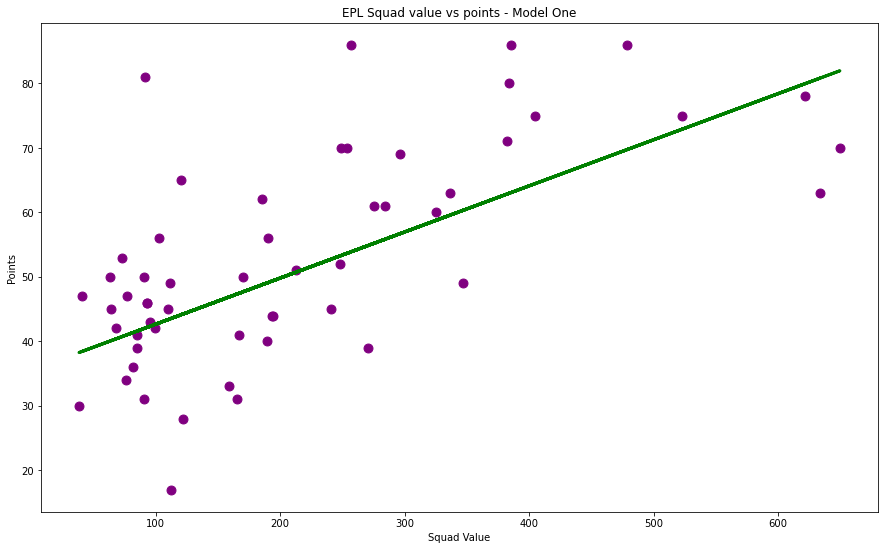

In [112]:
plt.figure(figsize=(15,9)) # width height
           
plt.scatter(X_test, y_test,  color='purple',s=80) # point size s =80

plt.plot(X_test, predictions, color='green', linewidth=3)   # LINEA PREDICCIONES

plt.xlabel("Squad Value")

plt.ylabel("Points")

plt.title("EPL Squad value vs points - Model One")

plt.show()

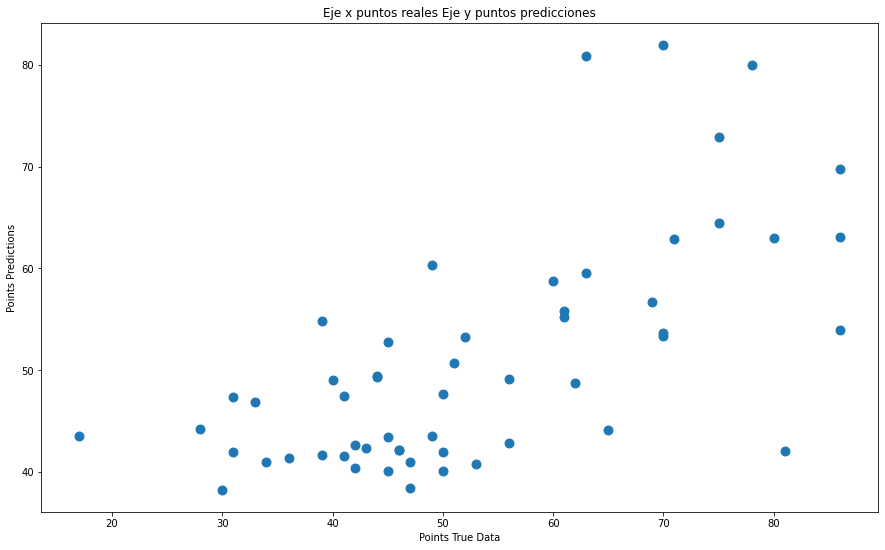

In [114]:
plt.figure(figsize=(15,9))

plt.scatter(y_test,predictions,s=80)

plt.xlabel("Points True Data")

plt.ylabel("Points Predictions")

plt.title("Eje x puntos reales Eje y puntos predicciones")

plt.show()

### Ajustamos los mínimos y máximos del gráfico

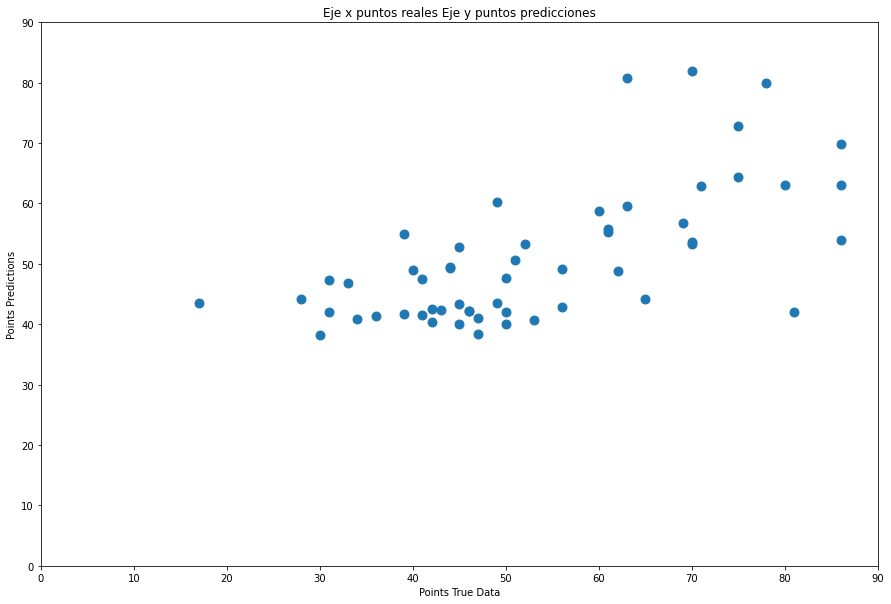

In [115]:
plt.figure(figsize=(15,10))

plt.scatter(y_test,predictions,s=80)

plt.xlabel("Points True Data")

plt.ylabel("Points Predictions")
plt.title("Eje x puntos reales Eje y puntos predicciones")

plt.xlim([0,90])
plt.ylim([0,90])

plt.show()

Muchos valores coinciden bien, pero otros no tanto.  
Es difícil ver qué tan lejos están nuestras predicciones de los valores reales.  

### ¿Cuántos puntos de diferencia tiene cada predicción?  

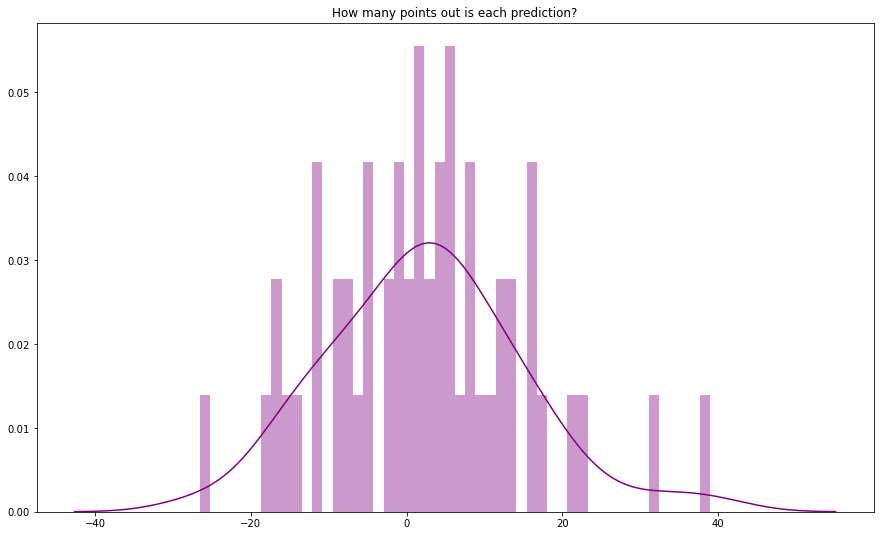

In [36]:
plt.figure(figsize=(15,9))

plt.title('How many points out is each prediction?')

sns.distplot((y_test-predictions),bins=50, color = 'purple');


Algunas predicciones están **muy desviadas, con errores de 30-40 puntos**.  
Pero en su mayoría, estamos dentro de un margen de aproximadamente 10 puntos.  

#### Error Absoluto Medio   
Esta métrica representa simplemente la **diferencia promedio entre la predicción y el valor real**.  
Esperamos poder reducir este error con la siguiente mejora.  

In [116]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))

# Mean Absolute Error: 9.728206663986418

Mean Absolute Error: 9.728206663986418


In [117]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df.head(10)

,Actual,Predicted
0,47,40.995974
1,56,42.834207
2,49,43.510133
3,63,80.843418
4,61,55.204724
5,65,44.123830
6,33,46.871881
7,42,42.591016
8,51,50.709280
9,86,69.763954


### Correlación entre valor real y predicción

In [118]:
df['Actual'].corr(df['Predicted'])

0.6540205213240837

## Mejorando el modelo
Para cada año se va a asignar un valor relativo del valor de la plantilla en cada temporada, no son lo mismo 100 millones en 2008 que en 2018. Se asignará 1 a la plantilla con más valor de cada temporada y un valor entre 0 y 1 proporcional al resto de plantillas.

In [119]:
relativeValue = []

for index, team in data.iterrows():

    season = team['Season']
    teamseason = data[data['Season'] == season]
    maxvalue = teamseason['Squad Value'].max()
    tempRelativeValue = team['Squad Value']/maxvalue
    relativeValue.append(tempRelativeValue)
    
data["Relative Value"] = relativeValue

data.head(30)

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position,Relative Value
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3,1.000000
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1,0.875584
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2,0.632481
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4,0.616794
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8,0.522744
5,EPL,2008,Manchester City,32,24.0,20,206.80,6.46,8,50,10,0.508483
6,EPL,2008,Everton FC,28,24.4,15,162.55,5.81,18,63,5,0.399680
7,EPL,2008,Newcastle United,32,24.8,20,134.95,4.22,-19,34,18,0.331817
8,EPL,2008,Portsmouth FC,31,26.8,19,131.50,4.24,-19,41,14,0.323334
9,EPL,2008,Aston Villa,21,25.4,8,111.80,5.32,6,62,6,0.274896


Como podemos observar, los **4 equipos debajo de Chelsea** tienen valores de plantilla más bajos.

Vamos a generar un **pairplot** para analizar la relación de la nueva columna con las demás variables.  

### Pairplot para verificar la relación de la nueva columna "valor relativo" con las demás  

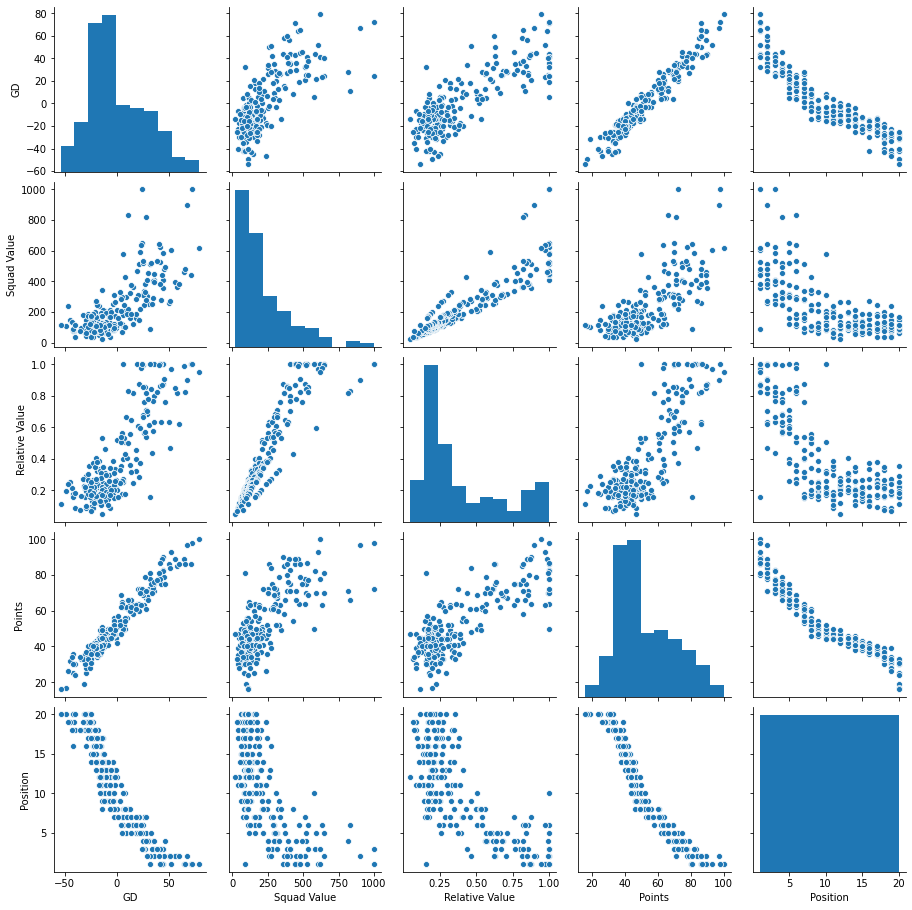

In [120]:
sns.pairplot(data[['GD', 'Squad Value', 'Relative Value', 'Points', 'Position']]);

Parece tener una **correlación más fuerte con los puntos y la diferencia de goles**. 

### Crear el nuevo modelo

In [121]:
X = data['Relative Value']
y = data['Points']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [126]:
lm = LinearRegression()
lm

LinearRegression()

In [127]:
lm.fit(X_train,y_train)

LinearRegression()

### Miramos el coeficiente  

Vamos a revisar nuevamente el **coeficiente** para ver qué nos dice el nuevo modelo.  
* Lo dividiremos por 10 para determinar cuántos puntos deberíamos ganar si aumentamos el valor de nuestra plantilla en un 10% del valor de la plantilla más cara.  
* Esto nos ayudará a interpretar el impacto de un incremento del 10% en el valor de la plantilla sobre el rendimiento al final de la temporada. 

In [128]:
print(lm.coef_/10)

[[5.31884201]]


### Creamos predicciones

In [129]:
predictions = lm.predict(X_test)

### Graficamos el nuevo modelo

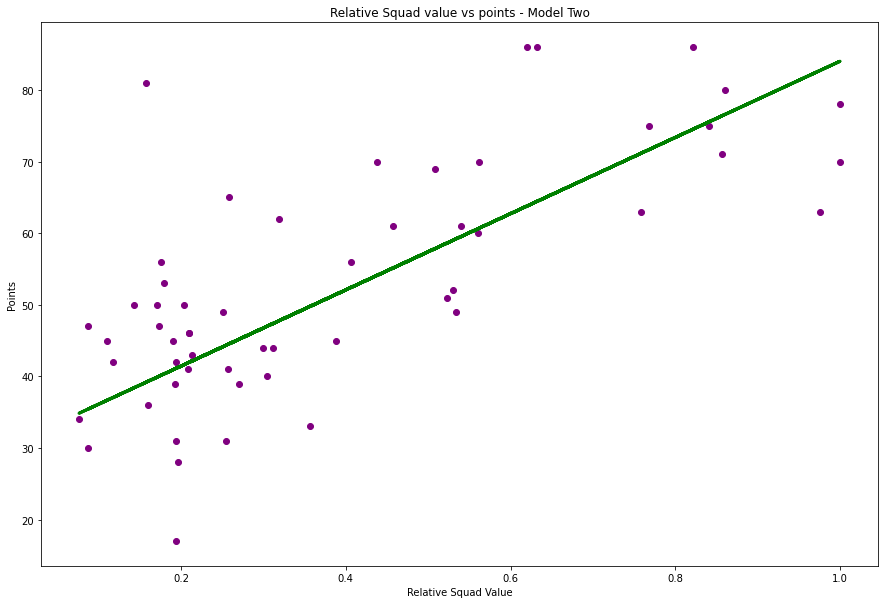

In [131]:
plt.figure(figsize=(15,10)) # width height

plt.scatter(X_test, y_test,  color='purple')

plt.plot(X_test, predictions, color='green', linewidth=3)


plt.xlabel("Relative Squad Value")

plt.ylabel("Points")


plt.title("Relative Squad value vs points - Model Two")

plt.show()

* El modelo predice **un poco más de 5 puntos**. Esto tiene sentido, ya que la **diferencia entre el equipo con más y menos puntos suele rondar los 53 puntos aproximadamente**.  

* Por lo tanto, **por cada 10% de diferencia con respecto al equipo más caro, nuestro modelo sugiere que se deberían perder 5.3 puntos**.  

Text(0.5, 1.0, 'Eje x puntos Reales   Eje y puntos predicciones')

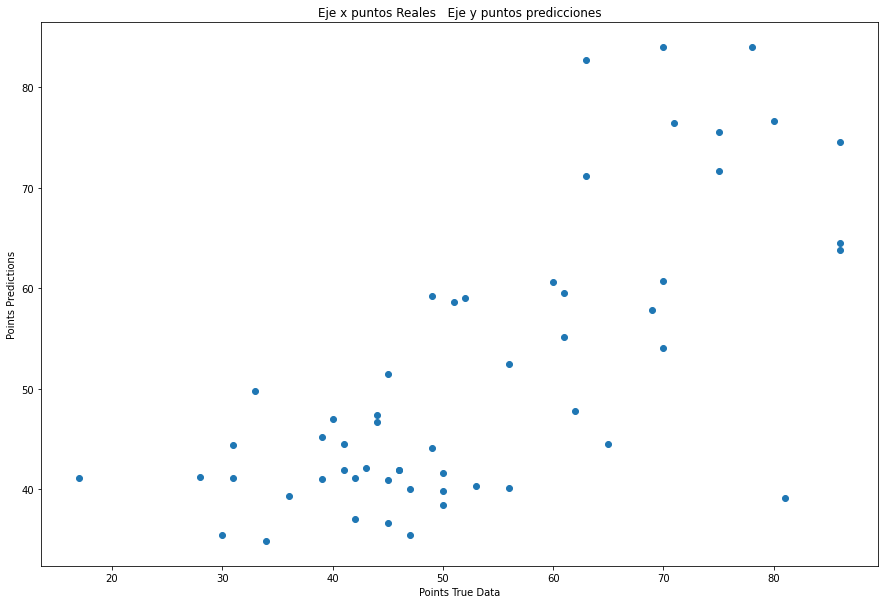

In [132]:
plt.figure(figsize=(15,10)) # width height

plt.xlabel("Points True Data")
plt.ylabel("Points Predictions")

plt.scatter(y_test,predictions);

plt.title("Eje x puntos Reales   Eje y puntos predicciones")


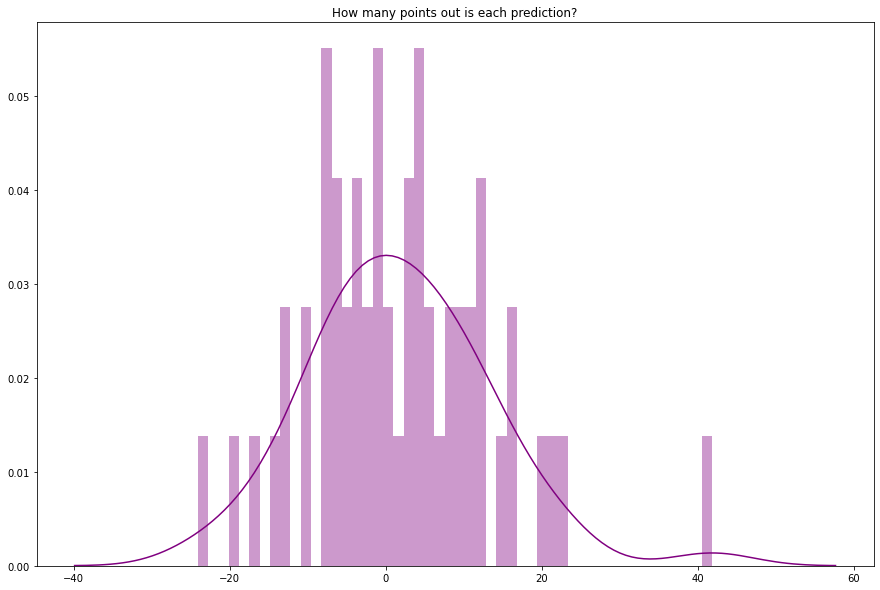

In [133]:
plt.figure(figsize=(15,10))
plt.title('How many points out is each prediction?')

sns.distplot((y_test-predictions),bins=50,color='purple');

Para respaldar nuestra observación visual, utilizaremos la métrica de **error absoluto medio (Mean Absolute Error - MAE)**, que representa la diferencia promedio entre la predicción y el valor real.  

Nuestra métrica anterior fue: **Error Absoluto Medio: 9.728206663986418**  

Esto representa **casi un 8% de mejora**... así que podemos decir que este modelo tiene más sentido que el anterior.  
No solo se ajusta mejor (la correlación entre las predicciones y la realidad también ha aumentado significativamente), sino que, basándonos en nuestro conocimiento del fútbol, sabemos que las tarifas de traspasos y los valores de mercado han aumentado drásticamente a lo largo del período de nuestro conjunto de datos.  

También podemos observar las particularidades de algunos **valores atípicos extremos (Leicester 15/16, Chelsea 15/16, Chelsea 18/19)** y el grupo de equipos alrededor de los puestos de descenso. Cada uno de estos casos podría analizarse en mayor profundidad, pero no es lo que estamos observando en este notebook.  


# Resumen

#### That just about covers off our simple linear regression 101 – let’s summarise what we learned.

1) Simple linear regression is an approach to explaining how one variable may affect another.

2) We built a model where we see how squad value affects points.

3) We observed what the model suggested and saw how many points an extra million spent might gain.

4) We checked the validity of the model and saw what the average error was.

5) We repeated the above with another (new) metric to create an improved model, reducing the error.

Great effort making it this far. For developing these concepts, you may want to gather data from other leagues to see if squad value is as closely related to winning as it is here. Otherwise, with aggregated event data, you could look to see how reliable shots or passes are as goal predictors.

As for building your stats model knowledge, take a read on multiple linear regressions and we will look to have an article up on this topic soon!